In [148]:
import pandas as pd

In [149]:
user_detail=pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1", engine='python')

In [150]:
user_detail.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [151]:
login_details=pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1", engine='python')

In [152]:
login_details.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [153]:
login_details.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [154]:
login_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [155]:
from datetime import datetime

# convert the 'Date' column to datetime format
#login_details['time_stamp']= pd.to_datetime(login_details['time_stamp'])
 
# Check the format of 'Date' column
#login_details.info()

In [156]:
#login_details.set_index('time_stamp')

In [157]:
#groupby based on id and weekly period and sum the number of visited 
#login_details.groupby(["time_stamp", "user_id"])["visited"].sum()
login_details['time_stamp'] = pd.to_datetime(login_details['time_stamp']) - pd.to_timedelta(7, unit='d')
login_details = login_details.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W')])['visited'].sum().reset_index().sort_values('time_stamp')
login_details

,user_id,time_stamp,visited
46441,8068,2012-05-27,1
58861,10163,2012-05-27,1
11925,2120,2012-05-27,1
9319,1693,2012-05-27,1
57820,9964,2012-05-27,1
68805,11999,2012-05-27,1
45894,7991,2012-05-27,1
35842,6102,2012-05-27,1
35463,6047,2012-05-27,1
11065,1995,2012-05-27,1


In [158]:
# if visited sum>3 then relace with 1(i.e adopted user) else replace with 0(non- adapted user)
adopted_user = []
for row in login_details['visited']:
        if row < 3 :    adopted_user.append(0)
        elif row >= 3: adopted_user.append(1)
        else: adopted_user.append('NUll')
login_details['adopted_user'] = adopted_user
print(login_details.head()) 

       user_id time_stamp  visited  adopted_user
46441     8068 2012-05-27        1             0
58861    10163 2012-05-27        1             0
11925     2120 2012-05-27        1             0
9319      1693 2012-05-27        1             0
57820     9964 2012-05-27        1             0


In [159]:
#merge adopted_user col with user details table
login_details.head()

,user_id,time_stamp,visited,adopted_user
46441,8068,2012-05-27,1,0
58861,10163,2012-05-27,1,0
11925,2120,2012-05-27,1,0
9319,1693,2012-05-27,1,0
57820,9964,2012-05-27,1,0


In [160]:
login_details.groupby(['user_id','adopted_user']).size()
#login_details.head()


user_id  adopted_user
1        0                1
2        0               10
         1                1
3        0                1
4        0                1
5        0                1
6        0                1
7        0                1
10       0               21
         1               52
11       0                1
13       0                1
14       0                1
17       0                1
19       0                2
20       0                2
         1                1
21       0                1
22       0                1
23       0                1
24       0                1
25       0                1
27       0                1
28       0                1
29       0                1
30       0                1
31       0                1
33       0               10
         1                1
36       0                1
                         ..
11965    1                1
11967    0                9
         1                8
11968    0                

In [161]:
login_details=login_details.groupby('user_id')['adopted_user'].apply(lambda x: x.max())
login_details.head()

user_id
1    0
2    1
3    0
4    0
5    0
Name: adopted_user, dtype: int64

In [162]:
login_details=pd.DataFrame(login_details)

In [164]:
final_data=user_detail.merge(login_details, left_on='object_id', right_on='user_id')
final_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


## Data Cleaning

In [166]:
#remove index and make object id as index
final_data=final_data.set_index('object_id')

In [168]:
#drop unwanted columns
final_data=final_data.drop(['name','email','creation_time', 'last_session_creation_time'], axis=1)
##'creation_time', 'last_session_creation_time'????? unwanted

KeyError: "['name' 'email' 'creation_time' 'last_session_creation_time'] not found in axis"

In [169]:
final_data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0
2,ORG_INVITE,0,0,1,316.0,1
3,ORG_INVITE,0,0,94,1525.0,0
4,GUEST_INVITE,0,0,1,5151.0,0
5,GUEST_INVITE,0,0,193,5240.0,0


## Data Exploration

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

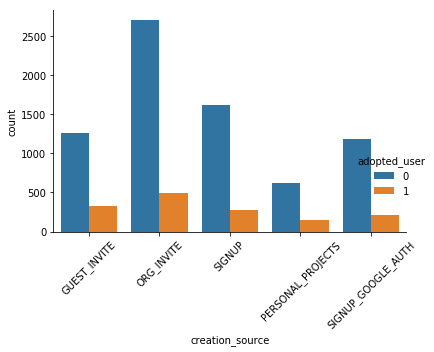

In [171]:
ax=sns.catplot(data=final_data, x='creation_source', kind='count', hue='adopted_user')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

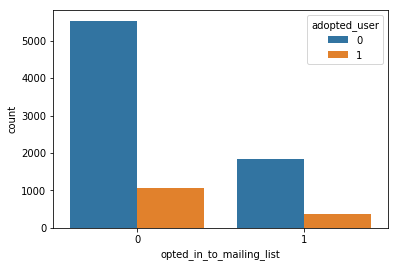

In [175]:
sns.countplot(x='opted_in_to_mailing_list',data=final_data, hue='adopted_user')

## feature engineering

In [189]:
# Encoding categorical data
final_data.dropna(inplace=True)
X = final_data.loc[:, final_data.columns != 'adopted_user']
y = final_data['adopted_user']

X=pd.get_dummies(X)
   
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 0)


In [190]:
X_train.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE
object_id,,,,,,
7650,0,0,16,11972.0,0,1
7749,0,0,1,5107.0,0,1
5211,0,0,20,9079.0,0,1
2063,0,0,60,2354.0,0,1
3503,1,0,30,4031.0,0,1


In [191]:
X_train.invited_by_user_id.value_counts()

6706.0     8
2308.0     8
6808.0     8
10628.0    8
730.0      7
4612.0     7
2354.0     7
4302.0     7
3261.0     7
10481.0    7
11770.0    7
1656.0     7
9726.0     7
8043.0     7
9434.0     7
1274.0     6
2042.0     6
4803.0     6
10119.0    6
8925.0     6
1810.0     6
9223.0     6
4551.0     6
2527.0     6
8914.0     6
3721.0     6
1525.0     6
3789.0     6
8554.0     6
10127.0    6
          ..
2052.0     1
3156.0     1
1909.0     1
1113.0     1
9381.0     1
5794.0     1
1875.0     1
7556.0     1
11374.0    1
8923.0     1
5751.0     1
3193.0     1
9093.0     1
2517.0     1
7839.0     1
3627.0     1
9368.0     1
11700.0    1
2485.0     1
3282.0     1
5197.0     1
5788.0     1
5705.0     1
7931.0     1
9363.0     1
8446.0     1
4514.0     1
2983.0     1
4845.0     1
8469.0     1
Name: invited_by_user_id, Length: 1979, dtype: int64

In [192]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[790   0]
 [166   0]]


In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
    

             precision    recall  f1-score   support

          0       0.83      1.00      0.90       790
          1       0.00      0.00      0.00       166

avg / total       0.68      0.83      0.75       956



c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8263598326359832

In [195]:
#metrics???? recall???
#coef_  This method does not work well when your linear model itself isn't a good fit for the dataset given. 
#This method can be used if your model’s accuracy is around 95%
#features corresponding each coef???
classifier.coef_

array([[ 1.86421215e-01, -8.79489414e-02,  1.34806252e-03,
         3.78197768e-06, -4.12965502e-01, -7.78373767e-01]])

In [198]:
from sklearn.ensemble import RandomForestClassifier as RClf
import numpy as np

model = RClf(n_estimators = 100)
model.fit(X_train, y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Feature Ranking:')

for f in range(X.shape[1]):
   print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))

Feature Ranking:
1. features 3 (0.536895)
2. features 2 (0.430284)
3. features 0 (0.012886)
4. features 1 (0.010633)
5. features 5 (0.004780)
6. features 4 (0.004522)


c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Feature Importances :  [0.14771675 0.22965282 0.22533053 0.21791653 0.17938335 0.        ]


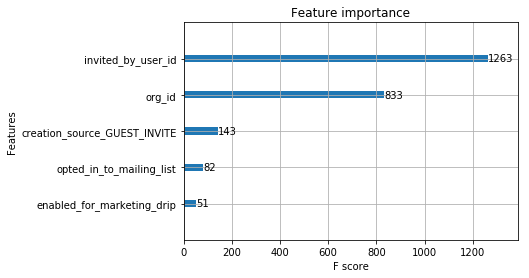

In [201]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)
y_pred2=xgb_model.predict(X_test)
print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

**Conclusion**

To convert a user into adopted user the factors that matter are who sends them the invitation to join. which is understandable as people mostly go with recommendation from people they trust/ have strong connection with. They might not join if they receive the invitation to try the product from random/lesser know people.
second important feature is org_id. if employees are asked by their own employer to work on a product they will highly consider it.


In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.83      0.98      0.89       790
          1       0.17      0.02      0.04       166

avg / total       0.71      0.81      0.75       956



In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.8106694560669456